In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
from tqdm import tqdm

In [7]:
import seaborn as sns

def plotsize(w, h):
    plt.figure(figsize=(w, h))

In [27]:
pd.set_option('display.max_columns', None)

In [9]:
cards = pd.read_csv("../data/ibm_credit_card/sd254_cards.csv")
users = pd.read_csv("../data/ibm_credit_card/sd254_users.csv")
_transactions = pd.read_csv("../data/ibm_credit_card/credit_card_transactions-ibm_v2.csv")
user_transactions = pd.read_csv("../data/ibm_credit_card/User0_credit_card_transactions.csv")

In [10]:
len(_transactions)

24386900

In [11]:
user_transactions.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [12]:
_transactions.User.nunique()

2000

In [13]:
_transactions.Card.nunique()

9

In [14]:
result_df = _transactions.merge(users, left_on='User', right_index=True, how='left')
transactions = result_df.merge(cards, left_on=['User', 'Card'], right_on=['User', 'CARD INDEX'], how='left')

In [15]:
print(len(_transactions))
print(len(transactions))

24386900
24386900


In [16]:
transactions.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No


<Axes: >

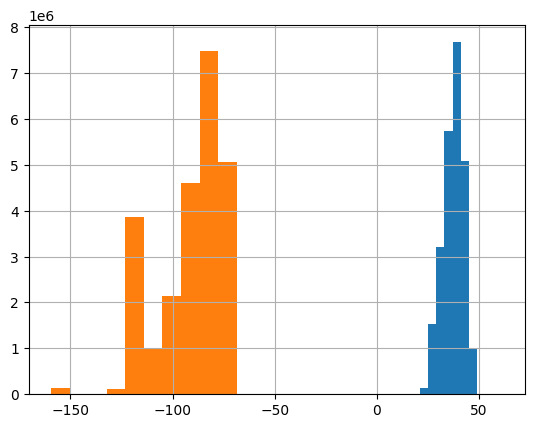

In [29]:
transactions.Latitude.hist()
transactions.Longitude.hist()

In [17]:
cards['Cards Issued'].value_counts()

Cards Issued
1    3114
2    2972
3      60
Name: count, dtype: int64

In [18]:
cards['Card Type'].value_counts()

Card Type
Debit              3511
Credit             2057
Debit (Prepaid)     578
Name: count, dtype: int64

In [19]:
transactions['Use Chip'].value_counts()

Use Chip
Swipe Transaction     15386082
Chip Transaction       6287598
Online Transaction     2713220
Name: count, dtype: int64

In [20]:
# Combine the year, month, day, and time columns into a single datetime column
transactions['datetime'] = pd.to_datetime(transactions[['Year', 'Month', 'Day']].astype(str)
                                            .apply('-'.join, 1) + ' ' + transactions['Time'])

# Convert the datetime column to Unix timestamp (in seconds)
transactions['unix_timestamp'] = (transactions['datetime'] - datetime(1970,1,1)).dt.total_seconds().astype(int)

In [21]:
transactions.drop(columns=['Card', 'Month', 'Day', 'Time', 'CARD INDEX'], inplace=True)

In [22]:
transactions.head()

,User,Year,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,datetime,unix_timestamp
0,0,2002,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,2002-09-01 06:21:00,1030861260
1,0,2002,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,2002-09-01 06:42:00,1030862520
2,0,2002,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,2002-09-02 06:22:00,1030947720
3,0,2002,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,2002-09-02 17:45:00,1030988700
4,0,2002,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,2002-09-03 06:23:00,1031034180


# Analysis of individual columns

## Notes

### Number of unique values in each column

- User : 2000
- Year : 30
- Amount : 98953
- Use Chip : 3
- Merchant Name : 100343
- Merchant City : 13429
- Merchant State : 223
- Zip : 27321
- MCC : 109
- Errors? : 23
- Is Fraud? : 2
- Person : 1993
- Current Age : 80
- Retirement Age : 29
- Birth Year : 80
- Birth Month : 12
- Gender : 2
- Address : 1999
- Apartment : 199
- City : 1286
- State : 51
- Zipcode : 1815
- Latitude : 989
- Longitude : 1224
- Per Capita Income - Zipcode : 1754
- Yearly Income - Person : 1948
- Total Debt : 1880
- FICO Score : 321
- Num Credit Cards : 9
- Card Brand : 4
- Card Type : 3
- Card Number : 6139
- Expires : 259
- CVV : 998
- Has Chip : 2
- Cards Issued : 3
- Credit Limit : 3653
- Acct Open Date : 303
- Year PIN last Changed : 19
- Card on Dark Web : 1
- datetime : 7859684
- unix_timestamp : 7859684

In [26]:
transactions['Address']

0                   462 Rose Lane
1                   462 Rose Lane
2                   462 Rose Lane
3                   462 Rose Lane
4                   462 Rose Lane
                    ...          
24386895    472 Ocean View Street
24386896    472 Ocean View Street
24386897    472 Ocean View Street
24386898    472 Ocean View Street
24386899    472 Ocean View Street
Name: Address, Length: 24386900, dtype: object

In [25]:
for colname in transactions.columns:
    print(colname, ':', transactions[colname].nunique(dropna=False))

User : 2000
Year : 30
Amount : 98953
Use Chip : 3
Merchant Name : 100343
Merchant City : 13429
Merchant State : 224
Zip : 27322
MCC : 109
Errors? : 24
Is Fraud? : 2
Person : 1993
Current Age : 80
Retirement Age : 29
Birth Year : 80
Birth Month : 12
Gender : 2
Address : 1999
Apartment : 200
City : 1286
State : 51
Zipcode : 1815
Latitude : 989
Longitude : 1224
Per Capita Income - Zipcode : 1754
Yearly Income - Person : 1948
Total Debt : 1880
FICO Score : 321
Num Credit Cards : 9
Card Brand : 4
Card Type : 3
Card Number : 6139
Expires : 259
CVV : 998
Has Chip : 2
Cards Issued : 3
Credit Limit : 3653
Acct Open Date : 303
Year PIN last Changed : 19
Card on Dark Web : 1
datetime : 7859684
unix_timestamp : 7859684


In [29]:
df = pd.DataFrame({
    'customer.id': transactions.User,
    'card.id': transactions['Card Number'],
    'amount_signed': [float(x[1:]) for x in transactions.Amount],
    'timestamp': transactions.unix_timestamp,
    'date': transactions.datetime,
    'merchant.name': transactions['Merchant Name'],
    'merchant.city': transactions['Merchant City'],
    'card.mcc': transactions['MCC'],
    'is_fraud': transactions["Is Fraud?"],
})

df['direction'] = df['amount_signed'].apply(lambda x: 'inbound' if x < 0 else 'outbound')
df['amount_usd'] = np.abs(np.array(df['amount_signed']))
df['log_amount'] = np.log(1 + np.array(df.amount_usd))

In [174]:
df.head()

,customer.id,card.id,amount_signed,timestamp,date,merchant.name,merchant.city,card.mcc,is_fraud,direction,amount_usd,log_amount
0,0,0,134.09,1030861260,2002-09-01 06:21:00,3527213246127876953,La Verne,5300,No,outbound,134.09,4.905941
1,0,0,38.48,1030862520,2002-09-01 06:42:00,-727612092139916043,Monterey Park,5411,No,outbound,38.48,3.675794
2,0,0,120.34,1030947720,2002-09-02 06:22:00,-727612092139916043,Monterey Park,5411,No,outbound,120.34,4.798597
3,0,0,128.95,1030988700,2002-09-02 17:45:00,3414527459579106770,Monterey Park,5651,No,outbound,128.95,4.867150
4,0,0,104.71,1031034180,2002-09-03 06:23:00,5817218446178736267,La Verne,5912,No,outbound,104.71,4.660699


In [97]:
df.is_fraud.value_counts()

is_fraud
No     24357143
Yes       29757
Name: count, dtype: int64

In [175]:
df['card.id'].value_counts()

card.id
1192    70008
3308    65325
5798    53720
5155    49261
1458    48278
        ...  
1363        4
1549        3
3934        2
689         1
747         1
Name: count, Length: 6139, dtype: int64

In [181]:
df['merchant.name'].nunique()

100343

In [176]:
df['customer.id'].value_counts()

customer.id
486     82355
396     80749
332     70010
262     68089
1249    65644
        ...  
457        25
231        21
1367       20
1767       16
1817       15
Name: count, Length: 2000, dtype: int64

In [98]:
round(df.describe(), 2)

,customer.id,card.id,amount_signed,timestamp,date,merchant.name,card.mcc,amount_usd,log_amount
count,24386900.00,24386900.00,24386900.00,2.438690e+07,24386900,2.438690e+07,24386900.00,24386900.00,24386900.00
mean,1001.02,1.35,43.63,1.339779e+09,2012-06-15 16:57:04.016494080,-4.769230e+17,5561.17,54.05,3.38
min,0.00,0.00,-500.00,6.628002e+08,1991-01-02 07:10:00,-9.222899e+18,1711.00,0.00,0.00
25%,510.00,0.00,9.20,1.230205e+09,2008-12-25 11:34:00,-4.500543e+18,5300.00,12.22,2.58
50%,1006.00,1.00,30.14,1.357894e+09,2013-01-11 08:49:00,-7.946765e+17,5499.00,36.17,3.62
75%,1477.00,2.00,65.06,1.472327e+09,2016-08-27 19:46:00,3.189517e+18,5812.00,72.00,4.29
max,1999.00,8.00,12390.50,1.582934e+09,2020-02-28 23:58:00,9.223292e+18,9402.00,12390.50,9.42
std,569.46,1.41,82.02,1.608778e+08,NaN,4.758940e+18,879.32,75.56,1.23


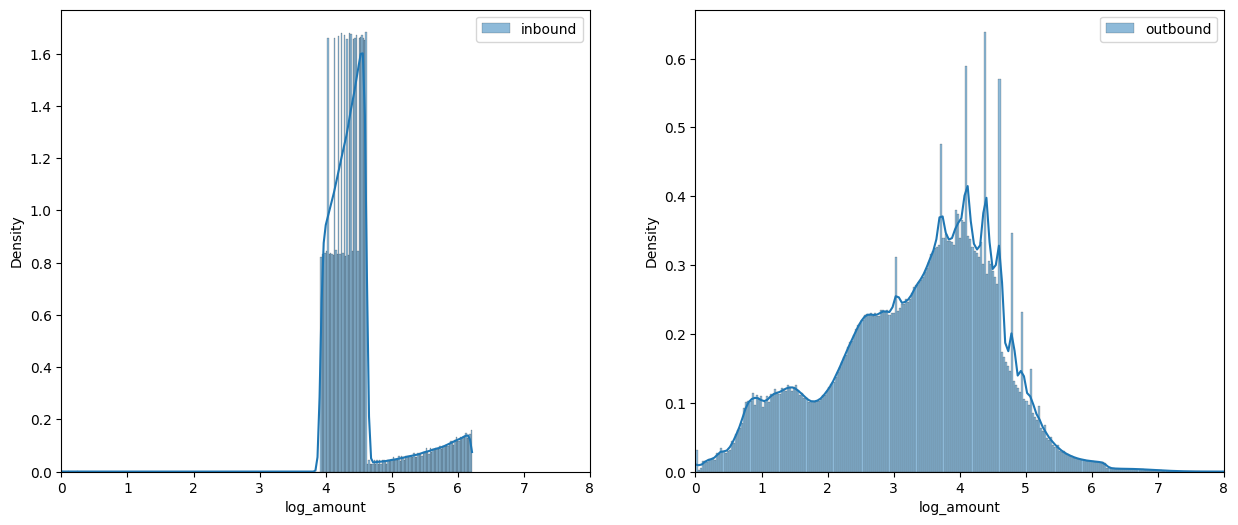

In [57]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df[df.direction == 'inbound'].log_amount, bins=300, label='inbound', stat='density', kde=True)
plt.xlim(0,8)
plt.legend()

plt.subplot(1,2,2)
sns.histplot(df[df.direction == 'outbound'].log_amount, bins=300, label='outbound', stat='density', kde=True)
plt.xlim(0,8)
plt.legend()

plt.show()

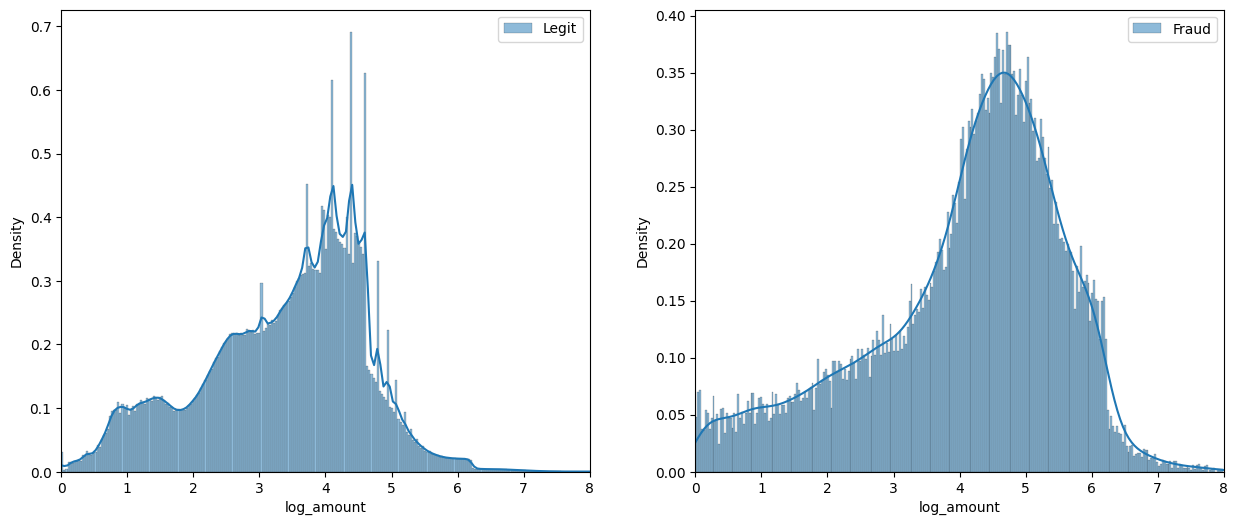

In [58]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df[df.is_fraud == 'No'].log_amount, bins=300, label='Legit', stat='density', kde=True)
plt.xlim(0,8)
plt.legend()

plt.subplot(1,2,2)
sns.histplot(df[df.is_fraud == 'Yes'].log_amount, bins=300, label='Fraud', stat='density', kde=True)
plt.xlim(0,8)
plt.legend()

plt.show()

# Looking at the individual customers and their data

In [182]:
customers = df.groupby('customer.id')

In [183]:
print(f'There are {len(customers)} customers in the data.')
print(f"There are {df['card.id'].nunique()} cards.")

There are 2000 customers in the data.
There are 6139 cards.


In [184]:
transactions.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Card ID,card.id,datetime,unix_timestamp
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,1,0,2002-09-01 06:21:00,1030861260
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,2,0,2002-09-01 06:42:00,1030862520
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,3,0,2002-09-02 06:22:00,1030947720
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,4,0,2002-09-02 17:45:00,1030988700
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,5,0,2002-09-03 06:23:00,1031034180


In [ ]:
transactions.drop(columns=['Card', 'Month', 'Day', 'Time', 'Amount'])

In [7]:
!pwd

/Users/masenka31/Documents/julia_projects/TransactionGPT/notebooks


In [44]:
cd '/Users/masenka31/Documents/julia_projects/TransactionGPT'

/Users/masenka31/Documents/julia_projects/TransactionGPT


In [1]:
import sys
sys.path

['/Users/masenka31/Documents/julia_projects/TransactionGPT/notebooks',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/Users/masenka31/Documents/julia_projects/TransactionGPT/.venv/lib/python3.9/site-packages']

In [8]:
sys.path.append("..") 

In [2]:
print(sys.path)
from src.process_data import IBMDataset

['/Users/masenka31/Documents/julia_projects/TransactionGPT/notebooks', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/masenka31/Documents/julia_projects/TransactionGPT/.venv/lib/python3.9/site-packages']


In [3]:
d = IBMDataset()

In [4]:
df = d.ibm_credit_card()

In [5]:
df

,customer.id,card.id,amount_signed,timestamp,date,merchant.name,merchant.city,card.mcc,is_fraud,direction,amount_usd,log_amount
0,0,4344676511950444,134.09,1030861260,2002-09-01 06:21:00,3527213246127876953,La Verne,5300,No,outbound,134.09,4.905941
1,0,4344676511950444,38.48,1030862520,2002-09-01 06:42:00,-727612092139916043,Monterey Park,5411,No,outbound,38.48,3.675794
2,0,4344676511950444,120.34,1030947720,2002-09-02 06:22:00,-727612092139916043,Monterey Park,5411,No,outbound,120.34,4.798597
3,0,4344676511950444,128.95,1030988700,2002-09-02 17:45:00,3414527459579106770,Monterey Park,5651,No,outbound,128.95,4.867150
4,0,4344676511950444,104.71,1031034180,2002-09-03 06:23:00,5817218446178736267,La Verne,5912,No,outbound,104.71,4.660699
...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,4994011318343994,-54.00,1582842180,2020-02-27 22:23:00,-5162038175624867091,Merrimack,5541,No,inbound,54.00,4.007333
24386896,1999,4994011318343994,54.00,1582842240,2020-02-27 22:24:00,-5162038175624867091,Merrimack,5541,No,outbound,54.00,4.007333
24386897,1999,4994011318343994,59.15,1582875780,2020-02-28 07:43:00,2500998799892805156,Merrimack,4121,No,outbound,59.15,4.096841
24386898,1999,4994011318343994,43.12,1582920600,2020-02-28 20:10:00,2500998799892805156,Merrimack,4121,No,outbound,43.12,3.786913
